In [3]:
import os
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sb
from pylab import rcParams

DATABASE_PATH = '../data/simple_time_based_model.zip'

# Allow us to display all the columns in a dataframe
pd.options.display.max_columns = None

In [5]:
df_time = pd.read_csv('simple_time_based_model.zip', compression='zip', header=0, sep=',', quotechar='"', low_memory=False, index_col=False)

In [6]:
# Calculate the proportion of positive examples
len(df_time[df_time['HEALTH_BASED_VIOLATION_THIS_YEAR'] == 1])/len(df_time)

0.015740520933235844

In [7]:
df_time['EPA_REGION'].value_counts()

5     616060
4     332815
2     213430
3     184810
6     165425
9     125420
10    117305
1     108550
8      83085
7      77400
01     42760
03     39155
Y          5
Name: EPA_REGION, dtype: int64

In [8]:
df_time.head(20)

,EPA_REGION,POPULATION_SERVED_COUNT,PRIMACY_TYPE,PRIMARY_SOURCE_CODE,PWS_ACTIVITY_CODE,PWSID,PWS_TYPE_CODE,SERVICE_CONNECTIONS_COUNT,STATE_CODE,ZIP_CODE,YEAR,HEALTH_BASED_VIOLATION_THIS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_ENFORCEMENTS_PREVIOUS_YEAR,NUM_ENFORCEMENTS_2_YEARS_AGO,NUM_ENFORCEMENTS_3_YEARS_AGO,NUM_ENFORCEMENTS_4_YEARS_AGO,NUM_ENFORCEMENTS_5_YEARS_AGO
0,1,39552.0,Tribal,GU,A,010106001,CWS,143,CT,06339-3060,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0
1,1,41185.0,Tribal,GW,I,010109001,NTNCWS,1,NaN,NaN,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,37860.0,Tribal,SWP,A,010109005,CWS,20,CT,06382,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1,84.0,Tribal,GW,A,010307001,CWS,33,MA,02535,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0
4,1,30.0,Tribal,GW,I,010502001,TNCWS,2,RI,02813,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,30.0,Tribal,GW,A,010502002,NTNCWS,1,RI,02813,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,5.0
6,1,30.0,Tribal,GW,A,010502003,NTNCWS,4,RI,02813,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.0,2.0,4.0,0.0
7,1,40.0,Tribal,GW,I,010502004,TNCWS,1,RI,02813,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
8,2,296.0,Tribal,GW,A,020000001,CWS,120,NY,14779,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2,20.0,Tribal,GW,I,020000002,CWS,90,NY,14779,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_time.set_index('PWSID', inplace=True)

In [14]:
df_time.head()

,EPA_REGION,POPULATION_SERVED_COUNT,PRIMACY_TYPE,PRIMARY_SOURCE_CODE,PWS_ACTIVITY_CODE,PWS_TYPE_CODE,SERVICE_CONNECTIONS_COUNT,STATE_CODE,ZIP_CODE,YEAR,HEALTH_BASED_VIOLATION_THIS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_ENFORCEMENTS_PREVIOUS_YEAR,NUM_ENFORCEMENTS_2_YEARS_AGO,NUM_ENFORCEMENTS_3_YEARS_AGO,NUM_ENFORCEMENTS_4_YEARS_AGO,NUM_ENFORCEMENTS_5_YEARS_AGO
PWSID,,,,,,,,,,,,,,,,,,,,,,,,,,
010106001,1,39552.0,Tribal,GU,A,CWS,143,CT,06339-3060,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0
010109001,1,41185.0,Tribal,GW,I,NTNCWS,1,NaN,NaN,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010109005,1,37860.0,Tribal,SWP,A,CWS,20,CT,06382,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
010307001,1,84.0,Tribal,GW,A,CWS,33,MA,02535,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0
010502001,1,30.0,Tribal,GW,I,TNCWS,2,RI,02813,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
copy_of_initial_data = df_time.to_csv("Copy_of_Initial_Data.csv", encoding='utf-8')

In [337]:
df_time['PWSID'].value_counts

<bound method IndexOpsMixin.value_counts of 0          010106001
1          010109001
2          010109005
3          010307001
4          010502001
5          010502002
6          010502003
7          010502004
8          020000001
9          020000002
10         020000003
11         020000004
12         020000005
13         020000006
14         020000007
15         020000008
16         020000009
17         020000010
18         020000012
19         020000013
20         020000014
21         020000015
22         020000016
23         020010464
24         020011102
25         020011103
26         020019100
27         040000002
28         040000003
29         040000004
             ...    
2106190    WY5680233
2106191    WY5680234
2106192    WY5680235
2106193    WY5680236
2106194    WY5680237
2106195    WY5680238
2106196    WY5680240
2106197    WY5680241
2106198    WY5680242
2106199    WY5680243
2106200    WY5680244
2106201    WY5680246
2106202    WY5680248
2106203    WY5680249
2106204    

In [338]:
len(df_time)

2106220

In [6]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106220 entries, 0 to 2106219
Data columns (total 27 columns):
EPA_REGION                                       object
POPULATION_SERVED_COUNT                          float64
PRIMACY_TYPE                                     object
PRIMARY_SOURCE_CODE                              object
PWS_ACTIVITY_CODE                                object
PWSID                                            object
PWS_TYPE_CODE                                    object
SERVICE_CONNECTIONS_COUNT                        object
STATE_CODE                                       object
ZIP_CODE                                         object
YEAR                                             float64
HEALTH_BASED_VIOLATION_THIS_YEAR                 float64
NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR        float64
NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR    float64
NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO          float64
NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_A

In [7]:
df_time.shape

(2106220, 27)

In [8]:
df_codes = pd.read_csv('contaminant-codes.csv', header=0, sep=',', quotechar='"', low_memory=False, index_col=False)
df_group_codes = pd.read_csv('contaminant-group-codes.csv', header=0, sep=',', quotechar='"', low_memory=False, index_col=False)
df_violations = pd.read_csv('violations.csv', header=0, sep=',', quotechar='"', low_memory=False, index_col=False)

In [9]:
df_codes.head()

,CODE,NAME,SCIENTIFIC_NAME,TYPE_CODE
0,0100,TURBIDITY,NaN,WQ
1,0200,SWTR,NaN,RL
2,0300,IESWTR,NaN,RL
3,0400,DBP STAGE 1,NaN,RL
4,0500,FILTER BACKWASH RULE,NaN,RL


In [10]:
df_group_codes.head()

,CONTAMINANT_CODE,CONTAMINANT_NAME,CONTAMINANT_GROUP,CONTAMINANT_GROUP_CODE
0,4000,"GROSS ALPHA, EXCL. RADON & U",ALL RADIOCHEMICAL,ARAD
1,4002,"GROSS ALPHA, INCL. RADON & U",ALL RADIOCHEMICAL,ARAD
2,4004,RADON,ALL RADIOCHEMICAL,ARAD
3,4006,COMBINED URANIUM,ALL RADIOCHEMICAL,ARAD
4,4100,GROSS BETA PARTICLE ACTIVITY,ALL RADIOCHEMICAL,ARAD


In [11]:
df_violations.head()

,PWSID,STATE,COUNTY_NAME,CITY,CONTAMINANT_CODE,CONTAMINANT_NAME,CONTAMINANT_GROUP,YEAR
0,020000008,NY,Cattaraugus County,Salamanca,2950,TTHM,TTHM & HAA5,2016
1,020000008,NY,Cattaraugus County,Salamanca,2950,TTHM,TOTAL TRIHALOMETHANE,2016
2,020000008,NY,Cattaraugus County,Salamanca,2456,TOTAL HALOACETIC ACIDS (HAA5),TTHM & HAA5,2016
3,020000008,NY,Cattaraugus County,Salamanca,2950,TTHM,TTHM & HAA5,2017
4,020000008,NY,Cattaraugus County,Salamanca,2950,TTHM,TOTAL TRIHALOMETHANE,2017


In [12]:
df_time.count()

EPA_REGION                                       2106220
POPULATION_SERVED_COUNT                          2106220
PRIMACY_TYPE                                     2106215
PRIMARY_SOURCE_CODE                              2092795
PWS_ACTIVITY_CODE                                2106220
PWSID                                            2106220
PWS_TYPE_CODE                                    2106215
SERVICE_CONNECTIONS_COUNT                        2106220
STATE_CODE                                       2061130
ZIP_CODE                                         2012760
YEAR                                             2106220
HEALTH_BASED_VIOLATION_THIS_YEAR                 2106220
NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR        2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR    2106220
NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO          2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO      2106220
NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO          2106220
NUM_NON_HEALTH_BASED_VIOLATIONS

In [13]:
df_time.shape

(2106220, 27)

In [14]:
df_time.duplicated(subset=None, keep='first')

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
2106190    False
2106191    False
2106192    False
2106193    False
2106194    False
2106195    False
2106196    False
2106197    False
2106198    False
2106199    False
2106200    False
2106201    False
2106202    False
2106203    False
2106204    False
2106205    False
2106206    False
2106207    False
2106208    False
2106209    False
2106210    False
2106211    False
2106212    False
2106213    False
2106214    False
2106215    False
2106216    False
2106217    Fal

In [15]:
df_time.drop(['PRIMACY_TYPE', 'PRIMARY_SOURCE_CODE', 
         'PWS_ACTIVITY_CODE', 'PWSID', 'PWS_TYPE_CODE', 
         'SERVICE_CONNECTIONS_COUNT', 'ZIP_CODE'], 
        axis='columns', inplace=True)
df_time.count()

EPA_REGION                                       2106220
POPULATION_SERVED_COUNT                          2106220
STATE_CODE                                       2061130
YEAR                                             2106220
HEALTH_BASED_VIOLATION_THIS_YEAR                 2106220
NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR        2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR    2106220
NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO          2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO      2106220
NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO          2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO      2106220
NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO          2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO      2106220
NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO          2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO      2106220
NUM_ENFORCEMENTS_PREVIOUS_YEAR                   2106220
NUM_ENFORCEMENTS_2_YEARS_AGO                     2106220
NUM_ENFORCEMENTS_3_YEARS_AGO   

In [16]:
df_time = df_time.dropna(axis='index')
df_time['EPA_REGION'] = df_time['EPA_REGION'].astype(int)
df_time['STATE_CODE'] = df_time['STATE_CODE'].astype("category")

In [17]:
df_time['EPA_REGION'].value_counts()

5     609775
4     321620
3     222020
2     204430
6     161200
1     146275
9     120730
10    116175
8      82095
7      76810
Name: EPA_REGION, dtype: int64

In [18]:
df_time.reset_index(inplace=True)

In [19]:
df_time.drop('index', axis=1, inplace=True)
df_time.head()

,EPA_REGION,POPULATION_SERVED_COUNT,STATE_CODE,YEAR,HEALTH_BASED_VIOLATION_THIS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_ENFORCEMENTS_PREVIOUS_YEAR,NUM_ENFORCEMENTS_2_YEARS_AGO,NUM_ENFORCEMENTS_3_YEARS_AGO,NUM_ENFORCEMENTS_4_YEARS_AGO,NUM_ENFORCEMENTS_5_YEARS_AGO
0,1,39552.0,CT,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0
1,1,37860.0,CT,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1,84.0,MA,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0
3,1,30.0,RI,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,30.0,RI,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,5.0


In [20]:
one_hot_copy = df_time.copy()

In [21]:
one_hot_copy.head()

,EPA_REGION,POPULATION_SERVED_COUNT,STATE_CODE,YEAR,HEALTH_BASED_VIOLATION_THIS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_ENFORCEMENTS_PREVIOUS_YEAR,NUM_ENFORCEMENTS_2_YEARS_AGO,NUM_ENFORCEMENTS_3_YEARS_AGO,NUM_ENFORCEMENTS_4_YEARS_AGO,NUM_ENFORCEMENTS_5_YEARS_AGO
0,1,39552.0,CT,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0
1,1,37860.0,CT,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1,84.0,MA,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0
3,1,30.0,RI,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,30.0,RI,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,5.0


### Convert the Year column to datetime objects:

In [22]:
# df = pd.read_csv('test.csv')
# df['date'] = pd.to_datetime(df['date'])    
# df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')
# city_data = df[df['city'] == 'London']
# result = sm.ols(formula = 'sales ~ date_delta', data = city_data).fit()

In [23]:
type(one_hot_copy['YEAR'][0])

numpy.float64

In [24]:
one_hot_copy['YEAR'] = one_hot_copy['YEAR'].astype(int)

In [25]:
one_hot_copy['YEAR'] = pd.to_datetime(one_hot_copy['YEAR'], format='%Y')

In [26]:
one_hot_copy['YEAR'].head(10)

0   2018-01-01
1   2018-01-01
2   2018-01-01
3   2018-01-01
4   2018-01-01
5   2018-01-01
6   2018-01-01
7   2018-01-01
8   2018-01-01
9   2018-01-01
Name: YEAR, dtype: datetime64[ns]

In [27]:
one_hot_copy.head()

,EPA_REGION,POPULATION_SERVED_COUNT,STATE_CODE,YEAR,HEALTH_BASED_VIOLATION_THIS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_ENFORCEMENTS_PREVIOUS_YEAR,NUM_ENFORCEMENTS_2_YEARS_AGO,NUM_ENFORCEMENTS_3_YEARS_AGO,NUM_ENFORCEMENTS_4_YEARS_AGO,NUM_ENFORCEMENTS_5_YEARS_AGO
0,1,39552.0,CT,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0
1,1,37860.0,CT,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1,84.0,MA,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0
3,1,30.0,RI,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,30.0,RI,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,5.0


In [28]:
df_time['EPA_REGION'].value_counts()

5     609775
4     321620
3     222020
2     204430
6     161200
1     146275
9     120730
10    116175
8      82095
7      76810
Name: EPA_REGION, dtype: int64

### Here we're fixing the format and type of the year column so that we'll be able to run the logit regression later
- Although the new year column is named the same as the old one, it's a separate column of ints rather than datetime objects (pandas is case sensitive so it can tell the difference)
- I kept the name the same because it's easy to type 'Year'

In [29]:
def year_maker(date_value):
    return date_value.year

In [30]:
one_hot_copy['Year'] = one_hot_copy['YEAR'].apply(year_maker)

In [31]:
one_hot_copy.head()

,EPA_REGION,POPULATION_SERVED_COUNT,STATE_CODE,YEAR,HEALTH_BASED_VIOLATION_THIS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_ENFORCEMENTS_PREVIOUS_YEAR,NUM_ENFORCEMENTS_2_YEARS_AGO,NUM_ENFORCEMENTS_3_YEARS_AGO,NUM_ENFORCEMENTS_4_YEARS_AGO,NUM_ENFORCEMENTS_5_YEARS_AGO,Year
0,1,39552.0,CT,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0,2018
1,1,37860.0,CT,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2018
2,1,84.0,MA,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0,2018
3,1,30.0,RI,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
4,1,30.0,RI,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,5.0,2018


### Now just reorder the columns for visual ease:

In [32]:
cols_at_start = ['POPULATION_SERVED_COUNT', 'Year']
one_hot_copy = one_hot_copy[[c for c in cols_at_start if c in one_hot_copy] + 
                            [c for c in one_hot_copy if c not in cols_at_start]]

In [33]:
one_hot_copy.head()

,POPULATION_SERVED_COUNT,Year,EPA_REGION,STATE_CODE,YEAR,HEALTH_BASED_VIOLATION_THIS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_ENFORCEMENTS_PREVIOUS_YEAR,NUM_ENFORCEMENTS_2_YEARS_AGO,NUM_ENFORCEMENTS_3_YEARS_AGO,NUM_ENFORCEMENTS_4_YEARS_AGO,NUM_ENFORCEMENTS_5_YEARS_AGO
0,39552.0,2018,1,CT,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0
1,37860.0,2018,1,CT,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,84.0,2018,1,MA,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0
3,30.0,2018,1,RI,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,2018,1,RI,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,5.0


### We don't need the original "Year" column anymore so drop it:

In [34]:
one_hot_copy.drop('YEAR', axis=1, inplace=True)

### Check what different year values are in the new 'Year' column:

In [35]:
one_hot_copy.Year.unique()

array([2018, 2017, 2016, 2015, 2014])

In [36]:
one_hot_copy.head()

,POPULATION_SERVED_COUNT,Year,EPA_REGION,STATE_CODE,HEALTH_BASED_VIOLATION_THIS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_ENFORCEMENTS_PREVIOUS_YEAR,NUM_ENFORCEMENTS_2_YEARS_AGO,NUM_ENFORCEMENTS_3_YEARS_AGO,NUM_ENFORCEMENTS_4_YEARS_AGO,NUM_ENFORCEMENTS_5_YEARS_AGO
0,39552.0,2018,1,CT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0
1,37860.0,2018,1,CT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,84.0,2018,1,MA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0
3,30.0,2018,1,RI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,2018,1,RI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,5.0


### We're just going to rename the columns here for visual ease:

In [37]:
one_hot_copy.rename(columns = {'POPULATION_SERVED_COUNT': 'Population', 
                               
                               'HEALTH_BASED_VIOLATION_THIS_YEAR': "Health_Violations_Year_0",
                               
                               'NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR': 'Health_Violations_Year_1', 
                               
                               'NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR': 'Other_Violations_Year_1', 
                               
                               'NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO': 'Health_Violations_Year_2',
                               
                               'NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO': 'Other_Violations_Year_2',
                               
                               'NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO': 'Health_Violations_Year_3',
                               
                               'NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO': 'Other_Violations_Year_3',
                               
                               'NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO': 'Health_Violations_Year_4', 
                               
                               'NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO': 'Other_Violations_Year_4',
                               
                               'NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO': 'Health_Violations_Year_5', 
                               
                               'NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO': 'Other_Violations_Year_5',
                               
                               'NUM_ENFORCEMENTS_PREVIOUS_YEAR': 'Enforcements_Year_1',
                               
                               'NUM_ENFORCEMENTS_2_YEARS_AGO': 'Enforcements_Year_2',
                               
                               'NUM_ENFORCEMENTS_3_YEARS_AGO': 'Enforcements_Year_3',
                               
                               'NUM_ENFORCEMENTS_4_YEARS_AGO': 'Enforcements_Year_4',
                               
                               'NUM_ENFORCEMENTS_5_YEARS_AGO': 'Enforcements_Year_5',
                               
                               'EPA_REGION': 'Epa_Region', 
                               
                               'STATE_CODE': 'State'}, inplace=True)


In [38]:
one_hot_copy.head()

,Population,Year,Epa_Region,State,Health_Violations_Year_0,Health_Violations_Year_1,Other_Violations_Year_1,Health_Violations_Year_2,Other_Violations_Year_2,Health_Violations_Year_3,Other_Violations_Year_3,Health_Violations_Year_4,Other_Violations_Year_4,Health_Violations_Year_5,Other_Violations_Year_5,Enforcements_Year_1,Enforcements_Year_2,Enforcements_Year_3,Enforcements_Year_4,Enforcements_Year_5
0,39552.0,2018,1,CT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0
1,37860.0,2018,1,CT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,84.0,2018,1,MA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0
3,30.0,2018,1,RI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,2018,1,RI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,5.0


In [39]:
df_time['EPA_REGION'].value_counts()

5     609775
4     321620
3     222020
2     204430
6     161200
1     146275
9     120730
10    116175
8      82095
7      76810
Name: EPA_REGION, dtype: int64

## As of right now we're just working with the simple_time_based_model data
### Check to make sure the state codes are exclusive:

In [40]:
df_one_hot = pd.get_dummies(one_hot_copy, columns=['Epa_Region', 'State'], drop_first=True)

In [41]:
df_one_hot.count()

Population                  2061130
Year                        2061130
Health_Violations_Year_0    2061130
Health_Violations_Year_1    2061130
Other_Violations_Year_1     2061130
Health_Violations_Year_2    2061130
Other_Violations_Year_2     2061130
Health_Violations_Year_3    2061130
Other_Violations_Year_3     2061130
Health_Violations_Year_4    2061130
Other_Violations_Year_4     2061130
Health_Violations_Year_5    2061130
Other_Violations_Year_5     2061130
Enforcements_Year_1         2061130
Enforcements_Year_2         2061130
Enforcements_Year_3         2061130
Enforcements_Year_4         2061130
Enforcements_Year_5         2061130
Epa_Region_2                2061130
Epa_Region_3                2061130
Epa_Region_4                2061130
Epa_Region_5                2061130
Epa_Region_6                2061130
Epa_Region_7                2061130
Epa_Region_8                2061130
Epa_Region_9                2061130
Epa_Region_10               2061130
State_AL                    

In [42]:
df_one_hot.head()

,Population,Year,Health_Violations_Year_0,Health_Violations_Year_1,Other_Violations_Year_1,Health_Violations_Year_2,Other_Violations_Year_2,Health_Violations_Year_3,Other_Violations_Year_3,Health_Violations_Year_4,Other_Violations_Year_4,Health_Violations_Year_5,Other_Violations_Year_5,Enforcements_Year_1,Enforcements_Year_2,Enforcements_Year_3,Enforcements_Year_4,Enforcements_Year_5,Epa_Region_2,Epa_Region_3,Epa_Region_4,Epa_Region_5,Epa_Region_6,Epa_Region_7,Epa_Region_8,Epa_Region_9,Epa_Region_10,State_AL,State_AR,State_AS,State_AZ,State_BC,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_GU,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MP,State_MS,State_MT,State_NB,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NS,State_NV,State_NY,State_OH,State_OK,State_ON,State_OR,State_PA,State_PQ,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,39552.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,37860.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,84.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,30.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


- 0 if: none of the values on the given row were equal to 
This means that the reason of absence was not in this group
1 if: somewhere among these 14 columns we have observed the number 1
- This means that the reason of absence was in this group

In [43]:
state_dummies = df_one_hot[df_one_hot.columns[df_one_hot.columns.get_loc('State_AL') :]]

### Below is the check the sum of the state dummies per row. Should equal 1 (if there was a violation) or 0 (if there wasn't) 

In [44]:
df_one_hot['state_check'] = state_dummies.sum(axis=1)

In [45]:
df_one_hot.head()

,Population,Year,Health_Violations_Year_0,Health_Violations_Year_1,Other_Violations_Year_1,Health_Violations_Year_2,Other_Violations_Year_2,Health_Violations_Year_3,Other_Violations_Year_3,Health_Violations_Year_4,Other_Violations_Year_4,Health_Violations_Year_5,Other_Violations_Year_5,Enforcements_Year_1,Enforcements_Year_2,Enforcements_Year_3,Enforcements_Year_4,Enforcements_Year_5,Epa_Region_2,Epa_Region_3,Epa_Region_4,Epa_Region_5,Epa_Region_6,Epa_Region_7,Epa_Region_8,Epa_Region_9,Epa_Region_10,State_AL,State_AR,State_AS,State_AZ,State_BC,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_GU,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MP,State_MS,State_MT,State_NB,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NS,State_NV,State_NY,State_OH,State_OK,State_ON,State_OR,State_PA,State_PQ,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY,state_check
0,39552.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,37860.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,84.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,30.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,30.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [189]:
df_one_hot.dtypes

Population                  float64
Year                          int64
Health_Violations_Year_0    float64
Health_Violations_Year_1    float64
Other_Violations_Year_1     float64
Health_Violations_Year_2    float64
Other_Violations_Year_2     float64
Health_Violations_Year_3    float64
Other_Violations_Year_3     float64
Health_Violations_Year_4    float64
Other_Violations_Year_4     float64
Health_Violations_Year_5    float64
Other_Violations_Year_5     float64
Enforcements_Year_1         float64
Enforcements_Year_2         float64
Enforcements_Year_3         float64
Enforcements_Year_4         float64
Enforcements_Year_5         float64
Epa_Region_2                  uint8
Epa_Region_3                  uint8
Epa_Region_4                  uint8
Epa_Region_5                  uint8
Epa_Region_6                  uint8
Epa_Region_7                  uint8
Epa_Region_8                  uint8
Epa_Region_9                  uint8
Epa_Region_10                 uint8
State_AL                    

### The below code is to check that the dummy variables where created succussfully. Should be an array of 1, 0:

In [46]:
df_one_hot.state_check.unique()

array([1, 0])

### Create a checkpoint of the time based data DF:

In [47]:
df_update1 = df_one_hot.copy()

In [48]:
df_update1.head()

,Population,Year,Health_Violations_Year_0,Health_Violations_Year_1,Other_Violations_Year_1,Health_Violations_Year_2,Other_Violations_Year_2,Health_Violations_Year_3,Other_Violations_Year_3,Health_Violations_Year_4,Other_Violations_Year_4,Health_Violations_Year_5,Other_Violations_Year_5,Enforcements_Year_1,Enforcements_Year_2,Enforcements_Year_3,Enforcements_Year_4,Enforcements_Year_5,Epa_Region_2,Epa_Region_3,Epa_Region_4,Epa_Region_5,Epa_Region_6,Epa_Region_7,Epa_Region_8,Epa_Region_9,Epa_Region_10,State_AL,State_AR,State_AS,State_AZ,State_BC,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_GU,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MP,State_MS,State_MT,State_NB,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NS,State_NV,State_NY,State_OH,State_OK,State_ON,State_OR,State_PA,State_PQ,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY,state_check
0,39552.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,37860.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,84.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,30.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,30.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Convert violation data into integers rather than floats:

In [49]:
df_update1.dtypes

Population                  float64
Year                          int64
Health_Violations_Year_0    float64
Health_Violations_Year_1    float64
Other_Violations_Year_1     float64
Health_Violations_Year_2    float64
Other_Violations_Year_2     float64
Health_Violations_Year_3    float64
Other_Violations_Year_3     float64
Health_Violations_Year_4    float64
Other_Violations_Year_4     float64
Health_Violations_Year_5    float64
Other_Violations_Year_5     float64
Enforcements_Year_1         float64
Enforcements_Year_2         float64
Enforcements_Year_3         float64
Enforcements_Year_4         float64
Enforcements_Year_5         float64
Epa_Region_2                  uint8
Epa_Region_3                  uint8
Epa_Region_4                  uint8
Epa_Region_5                  uint8
Epa_Region_6                  uint8
Epa_Region_7                  uint8
Epa_Region_8                  uint8
Epa_Region_9                  uint8
Epa_Region_10                 uint8
State_AL                    

In [50]:
df_update1[df_update1.columns[
    df_update1.columns.get_loc('Health_Violations_Year_0'): df_update1.columns.get_loc('Epa_Region_2')]] = df_update1[df_update1.columns[df_update1.columns.get_loc('Health_Violations_Year_0'): df_update1.columns.get_loc('Epa_Region_2')]].astype(int)

In [51]:
df_update1.dtypes

Population                  float64
Year                          int64
Health_Violations_Year_0      int64
Health_Violations_Year_1      int64
Other_Violations_Year_1       int64
Health_Violations_Year_2      int64
Other_Violations_Year_2       int64
Health_Violations_Year_3      int64
Other_Violations_Year_3       int64
Health_Violations_Year_4      int64
Other_Violations_Year_4       int64
Health_Violations_Year_5      int64
Other_Violations_Year_5       int64
Enforcements_Year_1           int64
Enforcements_Year_2           int64
Enforcements_Year_3           int64
Enforcements_Year_4           int64
Enforcements_Year_5           int64
Epa_Region_2                  uint8
Epa_Region_3                  uint8
Epa_Region_4                  uint8
Epa_Region_5                  uint8
Epa_Region_6                  uint8
Epa_Region_7                  uint8
Epa_Region_8                  uint8
Epa_Region_9                  uint8
Epa_Region_10                 uint8
State_AL                    

## Checking that the target variable is binary:
Since we are building a model to predict whether or not there was a violation, our target is going to be "HEALTH_BASED_VIOLATION_THIS_YEAR" variable from the original simple_time_based_model dataframe. To make sure that it's a binary variable, let's use Seaborn's countplot() function.

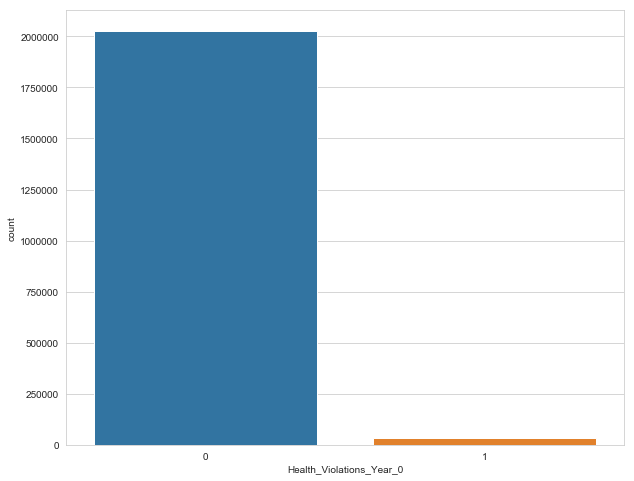

In [52]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')
sb.countplot(x='Health_Violations_Year_0',data=df_update1)

In [53]:
df_update1['Health_Violations_Year_0'].value_counts()

0    2028055
1      33075
Name: Health_Violations_Year_0, dtype: int64

In [566]:
df_copy = df_update1.copy().drop(['state_check'], axis=1)

In [247]:
df_copy.dtypes

Population                  float64
Year                          int64
Health_Violations_Year_0      int64
Health_Violations_Year_1      int64
Other_Violations_Year_1       int64
Health_Violations_Year_2      int64
Other_Violations_Year_2       int64
Health_Violations_Year_3      int64
Other_Violations_Year_3       int64
Health_Violations_Year_4      int64
Other_Violations_Year_4       int64
Health_Violations_Year_5      int64
Other_Violations_Year_5       int64
Enforcements_Year_1           int64
Enforcements_Year_2           int64
Enforcements_Year_3           int64
Enforcements_Year_4           int64
Enforcements_Year_5           int64
Epa_Region_2                  uint8
Epa_Region_3                  uint8
Epa_Region_4                  uint8
Epa_Region_5                  uint8
Epa_Region_6                  uint8
Epa_Region_7                  uint8
Epa_Region_8                  uint8
Epa_Region_9                  uint8
Epa_Region_10                 uint8
State_AL                    

In [206]:
df_copy['Health_Violations_Year_0'].value_counts(normalize=True)[0]* 100,
df_copy['Health_Violations_Year_1'].value_counts(normalize=True)[0]* 100,  
df_copy['Health_Violations_Year_2'].value_counts(normalize=True)[0]* 100, 
df_copy['Health_Violations_Year_3'].value_counts(normalize=True)[0]* 100,  
df_copy['Health_Violations_Year_4'].value_counts(normalize=True)[0]* 100, 
df_copy['Health_Violations_Year_5'].value_counts(normalize=True)[0]* 100


97.61087364698005

## From the above, we can see that the the majority of the data is negative values (0) when it comes to negative cases when it comes to Health Violations across the years
### So we're going to perform a logistic regression before sampling the data sets (as done in the original 'Logit_Crappy_Model' but more accurately (I think)
### Then we're going to take the sampels and perform the logisitic regression again.
### So continuing on:

 ## Omitting the dummy variables from the Standardization:
### Big Issue: When we standardize the inputs with the above scaler object, we would also standardize the dummies (BAD PRACTICE)
- When dummies are standardized they lose their interpretability 
   
- A unit change with dummy variables means:
     - Going from disregarding this dummy to taking ONLY this dummy into account 
    - However, we previously standardized all the features (including the dummies) and now a unit change is uninterpretable.

NOTE: We're could just perform the standardization before making the dummies, but I'm just trying to keep my coding skills... Disregard

In [207]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy, with_mean, with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), 
                               columns = self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order] 

In [208]:
df_copy.columns.values

array(['Population', 'Year', 'Health_Violations_Year_0',
       'Health_Violations_Year_1', 'Other_Violations_Year_1',
       'Health_Violations_Year_2', 'Other_Violations_Year_2',
       'Health_Violations_Year_3', 'Other_Violations_Year_3',
       'Health_Violations_Year_4', 'Other_Violations_Year_4',
       'Health_Violations_Year_5', 'Other_Violations_Year_5',
       'Enforcements_Year_1', 'Enforcements_Year_2',
       'Enforcements_Year_3', 'Enforcements_Year_4',
       'Enforcements_Year_5', 'Epa_Region_2', 'Epa_Region_3',
       'Epa_Region_4', 'Epa_Region_5', 'Epa_Region_6', 'Epa_Region_7',
       'Epa_Region_8', 'Epa_Region_9', 'Epa_Region_10', 'State_AL',
       'State_AR', 'State_AS', 'State_AZ', 'State_BC', 'State_CA',
       'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_GU', 'State_HI', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'St

In [210]:
columns_to_omit = ['Health_Violations_Year_0', 'Epa_Region_2', 'Epa_Region_3',
                   'Epa_Region_4', 'Epa_Region_5', 'Epa_Region_6', 'Epa_Region_7',
                   'Epa_Region_8', 'Epa_Region_9', 'Epa_Region_10', 'State_AL',
                   'State_AR', 'State_AS', 'State_AZ', 'State_BC', 'State_CA',
                   'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
                   'State_GA', 'State_GU', 'State_HI', 'State_IA', 'State_ID',
                   'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
                   'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN',
                   'State_MO', 'State_MP', 'State_MS', 'State_MT', 'State_NB',
                   'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ',
                   'State_NM', 'State_NS', 'State_NV', 'State_NY', 'State_OH',
                   'State_OK', 'State_ON', 'State_OR', 'State_PA', 'State_PQ',
                   'State_PR', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
                   'State_TX', 'State_UT', 'State_VA', 'State_VI', 'State_VT',
                   'State_WA', 'State_WI', 'State_WV', 'State_WY']

In [400]:
columns_to_scale = [x for x in df_copy.columns.values if x not in columns_to_omit]
columns_to_scale

['Population',
 'Year',
 'Health_Violations_Year_1',
 'Other_Violations_Year_1',
 'Health_Violations_Year_2',
 'Other_Violations_Year_2',
 'Health_Violations_Year_3',
 'Other_Violations_Year_3',
 'Health_Violations_Year_4',
 'Other_Violations_Year_4',
 'Health_Violations_Year_5',
 'Other_Violations_Year_5',
 'Enforcements_Year_1',
 'Enforcements_Year_2',
 'Enforcements_Year_3',
 'Enforcements_Year_4',
 'Enforcements_Year_5']

### Still fixing the scaler:
### Now create the fixed scaler object:

In [558]:
data_scaler = CustomScaler(columns_to_scale)

### Now the scaler is fixed and we can continue on:
- Below line will calculate and store the mean and standard deviation of each feature/variable from unscaled_inputs
    - Stored in data_scaler object
- Whenever you get new data the standardization info is contained in data_scaler

In [560]:
data_scaler.fit(df_copy)

/Users/victorclarke/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


CustomScaler(columns=['Population', 'Year', 'Health_Violations_Year_1', 'Other_Violations_Year_1', 'Health_Violations_Year_2', 'Other_Violations_Year_2', 'Health_Violations_Year_3', 'Other_Violations_Year_3', 'Health_Violations_Year_4', 'Other_Violations_Year_4', 'Health_Violations_Year_5', 'Other_Violations_Year_5', 'Enforcements_Year_1', 'Enforcements_Year_2', 'Enforcements_Year_3', 'Enforcements_Year_4', 'Enforcements_Year_5'],
       copy=None, with_mean=None, with_std=None)

### We have just prepared the 'scaling mechanism'
#### In order to apply it, we must call transform()
- Transforms the unscaled inputs using the info contained in absentee_scaler
- This subtracts the mean and divide by the standard deviation 

In [561]:
scaled_inputs = data_scaler.transform(df_copy)

/Users/victorclarke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


### Whenever you get new data, you will just apply below to reach same transformation as above (most common and useful way to transform new data when deploying a model):

new_data_raw = pd.read_csv('new_data.csv')

new_data_scaled = absentee_scaler.transform(new_data_raw)

In [562]:
# Below we can see that all the dummies remain untouched (0's and 1's):
scaled_inputs.head(20)

,Population,Year,Health_Violations_Year_0,Health_Violations_Year_1,Other_Violations_Year_1,Health_Violations_Year_2,Other_Violations_Year_2,Health_Violations_Year_3,Other_Violations_Year_3,Health_Violations_Year_4,Other_Violations_Year_4,Health_Violations_Year_5,Other_Violations_Year_5,Enforcements_Year_1,Enforcements_Year_2,Enforcements_Year_3,Enforcements_Year_4,Enforcements_Year_5,Epa_Region_2,Epa_Region_3,Epa_Region_4,Epa_Region_5,Epa_Region_6,Epa_Region_7,Epa_Region_8,Epa_Region_9,Epa_Region_10,State_AL,State_AR,State_AS,State_AZ,State_BC,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_GU,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MP,State_MS,State_MT,State_NB,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NS,State_NV,State_NY,State_OH,State_OK,State_ON,State_OR,State_PA,State_PQ,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,1.335163,1.414214,0,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,29.588603,0.147684,-0.165909,-0.172313,-0.176897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.276519,1.414214,0,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,0.159776,0.147684,-0.165909,0.144190,-0.176897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.032770,1.414214,0,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,-0.170885,2.950423,1.409855,1.093697,0.468745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.034642,1.414214,0,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,-0.170885,-0.163731,-0.165909,-0.172313,-0.176897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.034642,1.414214,0,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,-0.170885,1.393346,0.464396,-0.172313,1.437209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,-0.034642,1.414214,0,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,0.821098,2.016177,0.464396,1.093697,-0.176897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,-0.034295,1.414214,0,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,-0.170885,-0.163731,0.464396,-0.172313,-0.176897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,-0.025422,1.414214,0,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,-0.170885,-0.163731,-0.165909,0.144190,-0.176897,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,-0.034988,1.414214,0,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,-0.170885,-0.163731,-0.165909,-0.172313,-0.176897,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,-0.032215,1.414214,0,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,-0.170885,-0.163731,-0.165909,-0.172313,-0.176897,1,

In [65]:
scaled_inputs.shape

(2061130, 87)

In [217]:
# Split the data into independent and dependent variables. Also split into train and test sets.
Y = scaled_inputs['Health_Violations_Year_0'].copy()

In [218]:
Y is scaled_inputs['Health_Violations_Year_0']

False

In [219]:
X = scaled_inputs.drop(['Health_Violations_Year_0'], axis=1)

In [220]:
X.head()

,Population,Year,Health_Violations_Year_1,Other_Violations_Year_1,Health_Violations_Year_2,Other_Violations_Year_2,Health_Violations_Year_3,Other_Violations_Year_3,Health_Violations_Year_4,Other_Violations_Year_4,Health_Violations_Year_5,Other_Violations_Year_5,Enforcements_Year_1,Enforcements_Year_2,Enforcements_Year_3,Enforcements_Year_4,Enforcements_Year_5,Epa_Region_2,Epa_Region_3,Epa_Region_4,Epa_Region_5,Epa_Region_6,Epa_Region_7,Epa_Region_8,Epa_Region_9,Epa_Region_10,State_AL,State_AR,State_AS,State_AZ,State_BC,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_GU,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MP,State_MS,State_MT,State_NB,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NS,State_NV,State_NY,State_OH,State_OK,State_ON,State_OR,State_PA,State_PQ,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,1.335163,1.414214,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,29.588603,0.147684,-0.165909,-0.172313,-0.176897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.276519,1.414214,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,0.159776,0.147684,-0.165909,0.144190,-0.176897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.032770,1.414214,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,-0.170885,2.950423,1.409855,1.093697,0.468745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.034642,1.414214,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,-0.170885,-0.163731,-0.165909,-0.172313,-0.176897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.034642,1.414214,-0.096893,-0.080526,-0.100972,-0.084315,-0.106279,-0.087428,-0.106805,-0.090992,-0.108469,-0.092677,-0.170885,1.393346,0.464396,-0.172313,1.437209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Checking for missing values:

In [221]:
scaled_inputs.isnull().sum().unique()

array([0])

## Train/Test Split of Data:
### Overfitting:
- Model learns the predict the train data so well that it fails on new data
- So split the data into Train and Test to access the model's accuracy on predicting new data
### Data Shuffling:
- In order to remove all types of dependencies that come from the order of the data set 


In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=Y)

### Splitting the data and then training it:

In [73]:
display(x_train.shape)
display(x_test.shape)
display(len(x_test) / (len(x_test) + len(x_train)))
display(y_train.shape)
display(y_test.shape)
display(y_train)
display(len(y_train[y_train==1])/len(y_train))
display(len(y_test[y_test==1])/len(y_test))

(1648904, 86)

(412226, 86)

0.2

(1648904,)

(412226,)

14315      0
1023013    0
1713584    0
1905517    0
1007064    0
2022208    0
1890359    0
805850     0
194381     0
1415375    0
808452     0
103977     0
1443926    0
461724     0
67912      0
571608     0
1337330    0
1764853    0
202619     0
473874     0
358161     0
1144908    0
1155862    0
790665     0
1380788    0
857791     0
932527     0
1861686    0
1808419    0
1276148    0
          ..
1073619    0
189594     0
277792     0
81457      0
79045      0
1168425    0
765356     0
476524     0
986565     0
450516     0
1284166    0
1475398    0
931719     0
55396      0
601475     0
746969     0
1647854    0
1814483    0
1038035    0
79132      0
1552039    0
917093     0
337964     0
1597737    0
661171     0
1916179    0
1054188    0
1590417    0
718870     0
144540     0
Name: Health_Violations_Year_0, Length: 1648904, dtype: int64

0.01604702274965674

0.01604702274965674

# Training the model and Assessing its Accuracy:
## Logistic Regression with sklearn:

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [75]:
reg = LogisticRegression()

In [77]:
reg.fit(x_train, y_train)

/Users/victorclarke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
reg.score(x_train, y_train)

0.9853011454881545

## As we can see, even when run properly, we have a ridiclously high accuracy rate. The model we ran isn't THAT good. However this is probably because ~98% of the data set is all 0's, and this caused the model to just predict all those 0's rather than the 1's that we're looking for. 
## We're going to MANUALLY check the accuracy to make sure that the model was correct:

#### (Build score method above from scratch):
- Accuracy:
    - Logistic Regression trained on train inputs
    - Finds outputs that are trying to be as close to the targets are possible
    - In this case 98.5% of the model ouputs match the targets
- So to find accuracy of model manually, find the model outputs and compare them with the targets:
    - Find model ouputs with .predict()

In [79]:
# Model itself contained in variable 'reg'
model_outputs = reg.predict(x_train)
model_outputs[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
# Let's look at the targets to compare. Look similar but have differences
y_train.head(100)

14315      0
1023013    0
1713584    0
1905517    0
1007064    0
2022208    0
1890359    0
805850     0
194381     0
1415375    0
808452     0
103977     0
1443926    0
461724     0
67912      0
571608     0
1337330    0
1764853    0
202619     0
473874     0
358161     0
1144908    0
1155862    0
790665     0
1380788    0
857791     0
932527     0
1861686    0
1808419    0
1276148    0
          ..
1135935    1
1802835    0
1058958    0
871555     0
1180375    0
912303     0
515760     0
1659631    0
1356702    0
1358251    0
1884605    0
617417     0
1683152    0
1892448    0
1526208    0
1270408    0
1207819    0
1044101    0
1451952    0
2004354    0
2045500    0
574905     0
1732749    0
662852     0
1250938    0
1330509    0
1839062    0
783116     0
1370088    0
1105725    0
Name: Health_Violations_Year_0, Length: 100, dtype: int64

In [81]:
# See which elements have been guessed correctly and whihc haven't
model_outputs == y_train 

14315      True
1023013    True
1713584    True
1905517    True
1007064    True
2022208    True
1890359    True
805850     True
194381     True
1415375    True
808452     True
103977     True
1443926    True
461724     True
67912      True
571608     True
1337330    True
1764853    True
202619     True
473874     True
358161     True
1144908    True
1155862    True
790665     True
1380788    True
857791     True
932527     True
1861686    True
1808419    True
1276148    True
           ... 
1073619    True
189594     True
277792     True
81457      True
79045      True
1168425    True
765356     True
476524     True
986565     True
450516     True
1284166    True
1475398    True
931719     True
55396      True
601475     True
746969     True
1647854    True
1814483    True
1038035    True
79132      True
1552039    True
917093     True
337964     True
1597737    True
661171     True
1916179    True
1054188    True
1590417    True
718870     True
144540     True
Name: Health_Violations_

#### How many matches are there?:

In [82]:
np.sum(model_outputs == y_train)

1624667

In [83]:
model_outputs.shape[0]

1648904

#### Finally, check/verify the accuracy:

In [85]:
np.sum(model_outputs == y_train) / model_outputs.shape[0]

0.9853011454881545

# As of now, the logistic regression is working, but not accurately because we're training it on 98% negative cases. So we're going to improve it and work with the samples.
## We're going to try to run an "Informed Over Sample" which is a synthetic minority over-sampling technique. 
### "This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models."

### Let's see how many of the violation values are contributing to this massive 98% 0 value:

In [500]:
df_copy2 = df_update1.copy().drop(['state_check'], axis=1)

In [521]:
test1 = df_copy2[(df_copy2['Health_Violations_Year_0'] == 0) & 
                (df_copy2['Health_Violations_Year_1'] == 0) &
                (df_copy2['Health_Violations_Year_2'] == 0) &
                (df_copy2['Health_Violations_Year_3'] == 0) &
                (df_copy2['Health_Violations_Year_4'] == 0) &
                (df_copy2['Health_Violations_Year_5'] == 0) &
                (df_copy2['Other_Violations_Year_1'] == 0) &
                (df_copy2['Other_Violations_Year_2'] == 0) &
                (df_copy2['Other_Violations_Year_3'] == 0) &
                (df_copy2['Other_Violations_Year_4'] == 0) &
                (df_copy2['Other_Violations_Year_5'] == 0)].copy()

In [523]:
test1 is df_copy2

False

### Let's confirm that test1 is giving us what we want. There should only be one value (0) for each violation column:

In [407]:
# set

### It worked properly, now let's see how many values there are:

In [408]:
len(test1)

1627825

### That's nearly half of the original DF! We don't need these immediately, at least not within our training data! Maybe we should include this within our clustering later on when we merge the other csv's from the SQL tables together. But not right now. So let's get rid of these for our analysis. But let's check how many target based 0's are left:

len(df_copy[(df_copy['Health_Violations_Year_0'] == 0)]) - len(test1)

In [524]:
len(df_copy2) - len(df_copy2[df_copy2['Health_Violations_Year_0'] == 0])

33075

### As we can see, we only have about 33,000 targets that have a value of 1. Yikes. So for our training data, let's not include our test1 data and just use about 33,000 random 0 values from the remaining target column of df_copy[df_copy['Health_Violations_Year_0'] == 0] without the test1 values:
- This is the value of the size of the original dataset, which would split the target values of 0, 1 in half. 
- We'll choose at random to try to minimize any bias and reduce any patterns

In [380]:
len(df_copy2) - len(test1)

433305

In [525]:
len(df_copy2[df_copy2['Health_Violations_Year_0'] == 0]) - len(test1)

400230

### So there are about 400,000 values that are 0 remaining in the target column. Let's random sample about 33,000 of them for our training data:

In [526]:
df_less_test1 = df_copy2[~df_copy2.isin(test1)].dropna(how = 'all').copy()

### TODO: There may be excessive duplicates in this dataset. Search for duplicates later:

In [317]:
# test7 = df_copy.drop_duplicates(subset=['Population', 'Year', 'Health_Violations_Year_0',
#        'Health_Violations_Year_1', 'Other_Violations_Year_1',
#        'Health_Violations_Year_2', 'Other_Violations_Year_2',
#        'Health_Violations_Year_3', 'Other_Violations_Year_3',
#        'Health_Violations_Year_4', 'Other_Violations_Year_4',
#        'Health_Violations_Year_5', 'Other_Violations_Year_5',
#        'Enforcements_Year_1', 'Enforcements_Year_2',
#        'Enforcements_Year_3', 'Enforcements_Year_4',
#        'Enforcements_Year_5', 'Epa_Region_2', 'Epa_Region_3',
#        'Epa_Region_4', 'Epa_Region_5', 'Epa_Region_6', 'Epa_Region_7',
#        'Epa_Region_8', 'Epa_Region_9', 'Epa_Region_10', 'State_AL',
#        'State_AR', 'State_AS', 'State_AZ', 'State_BC', 'State_CA',
#        'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
#        'State_GA', 'State_GU', 'State_HI', 'State_IA', 'State_ID',
#        'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
#        'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN',
#        'State_MO', 'State_MP', 'State_MS', 'State_MT', 'State_NB',
#        'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ',
#        'State_NM', 'State_NS', 'State_NV', 'State_NY', 'State_OH',
#        'State_OK', 'State_ON', 'State_OR', 'State_PA', 'State_PQ',
#        'State_PR', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
#        'State_TX', 'State_UT', 'State_VA', 'State_VI', 'State_VT',
#        'State_WA', 'State_WI', 'State_WV', 'State_WY'], keep=False)



In [527]:
len(df_less_test1)

433305

In [528]:
df_less_test1['Health_Violations_Year_0'].value_counts()

0.0    400230
1.0     33075
Name: Health_Violations_Year_0, dtype: int64

### Now we're getting the subsets that we want, however, the isin() method converted the int64's into something weird. They're still int's but they're added with a period (0 goes to 0.0). This format should output a float, but it's not, and it's going to messup the scaler later on. So let's try another method:

In [529]:
df_less_test1[df_less_test1.columns[
    df_less_test1.columns.get_loc('Health_Violations_Year_0')]] = df_less_test1[df_less_test1.columns[df_less_test1.columns.get_loc('Health_Violations_Year_0')]].astype(int)

In [530]:
df_less_test1[df_less_test1.columns[
    df_less_test1.columns.get_loc('Epa_Region_2'):]] = df_less_test1[df_less_test1.columns[df_less_test1.columns.get_loc('Epa_Region_2'):]].astype(int)

In [531]:
df_less_test1.head()

,Population,Year,Health_Violations_Year_0,Health_Violations_Year_1,Other_Violations_Year_1,Health_Violations_Year_2,Other_Violations_Year_2,Health_Violations_Year_3,Other_Violations_Year_3,Health_Violations_Year_4,Other_Violations_Year_4,Health_Violations_Year_5,Other_Violations_Year_5,Enforcements_Year_1,Enforcements_Year_2,Enforcements_Year_3,Enforcements_Year_4,Enforcements_Year_5,Epa_Region_2,Epa_Region_3,Epa_Region_4,Epa_Region_5,Epa_Region_6,Epa_Region_7,Epa_Region_8,Epa_Region_9,Epa_Region_10,State_AL,State_AR,State_AS,State_AZ,State_BC,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_GU,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MP,State_MS,State_MT,State_NB,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NS,State_NV,State_NY,State_OH,State_OK,State_ON,State_OR,State_PA,State_PQ,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
1370,3500.0,2018.0,0,0.0,1.0,0.0,54.0,1.0,112.0,1.0,163.0,0.0,4.0,2.0,3.0,2.0,5.0,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1371,515.0,2018.0,0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,3.0,2.0,2.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1372,515.0,2018.0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1373,23.0,2018.0,0,0.0,0.0,0.0,16.0,0.0,8.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1374,580.0,2018.0,0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Ok, that type conversion is complete. Let's carry on:

In [532]:
df_majority = df_less_test1[df_less_test1['Health_Violations_Year_0']==0]
df_minority = df_less_test1[df_less_test1['Health_Violations_Year_0']==1]

In [533]:
df_maj_reduced = df_majority.sample(n=34000,     # To match about equal to minority class 
                                    replace=False)

In [534]:
df_downsampled = pd.concat([df_maj_reduced, df_minority])

In [535]:
len(df_downsampled)

67075

In [536]:
df_downsampled['Health_Violations_Year_0'].unique()

array([0, 1])

In [537]:
df_downsampled.dtypes

Population                  float64
Year                        float64
Health_Violations_Year_0      int64
Health_Violations_Year_1    float64
Other_Violations_Year_1     float64
Health_Violations_Year_2    float64
Other_Violations_Year_2     float64
Health_Violations_Year_3    float64
Other_Violations_Year_3     float64
Health_Violations_Year_4    float64
Other_Violations_Year_4     float64
Health_Violations_Year_5    float64
Other_Violations_Year_5     float64
Enforcements_Year_1         float64
Enforcements_Year_2         float64
Enforcements_Year_3         float64
Enforcements_Year_4         float64
Enforcements_Year_5         float64
Epa_Region_2                  int64
Epa_Region_3                  int64
Epa_Region_4                  int64
Epa_Region_5                  int64
Epa_Region_6                  int64
Epa_Region_7                  int64
Epa_Region_8                  int64
Epa_Region_9                  int64
Epa_Region_10                 int64
State_AL                    

In [538]:
df_downsampled.head()

,Population,Year,Health_Violations_Year_0,Health_Violations_Year_1,Other_Violations_Year_1,Health_Violations_Year_2,Other_Violations_Year_2,Health_Violations_Year_3,Other_Violations_Year_3,Health_Violations_Year_4,Other_Violations_Year_4,Health_Violations_Year_5,Other_Violations_Year_5,Enforcements_Year_1,Enforcements_Year_2,Enforcements_Year_3,Enforcements_Year_4,Enforcements_Year_5,Epa_Region_2,Epa_Region_3,Epa_Region_4,Epa_Region_5,Epa_Region_6,Epa_Region_7,Epa_Region_8,Epa_Region_9,Epa_Region_10,State_AL,State_AR,State_AS,State_AZ,State_BC,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_GU,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MP,State_MS,State_MT,State_NB,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NS,State_NV,State_NY,State_OH,State_OK,State_ON,State_OR,State_PA,State_PQ,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
56003,620.0,2018.0,0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
319230,53.0,2018.0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1892955,56.0,2014.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636540,75.0,2017.0,0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1232498,110.0,2016.0,0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,3.0,0.0,4.0,1.0,9.0,9.0,11.0,11.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [164]:
df_downsampled['Health_Violations_Year_0'].value_counts(normalize=True)[0]* 100
df_downsampled['Health_Violations_Year_1'].value_counts(normalize=True)[0]* 100
df_downsampled['Health_Violations_Year_1'].value_counts(normalize=True)[0]* 100
df_downsampled['Health_Violations_Year_2'].value_counts(normalize=True)[0]* 100
df_downsampled['Health_Violations_Year_3'].value_counts(normalize=True)[0]* 100
df_downsampled['Health_Violations_Year_4'].value_counts(normalize=True)[0]* 100
df_downsampled['Health_Violations_Year_5'].value_counts(normalize=True)[0]* 100

50.6895266492732

In [539]:
df_downsampled.columns.values

array(['Population', 'Year', 'Health_Violations_Year_0',
       'Health_Violations_Year_1', 'Other_Violations_Year_1',
       'Health_Violations_Year_2', 'Other_Violations_Year_2',
       'Health_Violations_Year_3', 'Other_Violations_Year_3',
       'Health_Violations_Year_4', 'Other_Violations_Year_4',
       'Health_Violations_Year_5', 'Other_Violations_Year_5',
       'Enforcements_Year_1', 'Enforcements_Year_2',
       'Enforcements_Year_3', 'Enforcements_Year_4',
       'Enforcements_Year_5', 'Epa_Region_2', 'Epa_Region_3',
       'Epa_Region_4', 'Epa_Region_5', 'Epa_Region_6', 'Epa_Region_7',
       'Epa_Region_8', 'Epa_Region_9', 'Epa_Region_10', 'State_AL',
       'State_AR', 'State_AS', 'State_AZ', 'State_BC', 'State_CA',
       'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_GU', 'State_HI', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'St

In [540]:
unscaled_sample = df_downsampled.copy()

In [591]:
from sklearn.preprocessing import RobustScaler

sample_scaler = StandardScaler()

In [554]:
unscaled_sample[['Population', 'Year','Health_Violations_Year_1', 'Other_Violations_Year_1',
       'Health_Violations_Year_2', 'Other_Violations_Year_2',
       'Health_Violations_Year_3', 'Other_Violations_Year_3',
       'Health_Violations_Year_4', 'Other_Violations_Year_4',
       'Health_Violations_Year_5', 'Other_Violations_Year_5',
       'Enforcements_Year_1', 'Enforcements_Year_2',
       'Enforcements_Year_3', 'Enforcements_Year_4',
       'Enforcements_Year_5']] = sample_scaler.fit_transform(unscaled_sample[['Population', 'Year','Health_Violations_Year_1', 'Other_Violations_Year_1',
       'Health_Violations_Year_2', 'Other_Violations_Year_2',
       'Health_Violations_Year_3', 'Other_Violations_Year_3',
       'Health_Violations_Year_4', 'Other_Violations_Year_4',
       'Health_Violations_Year_5', 'Other_Violations_Year_5',
       'Enforcements_Year_1', 'Enforcements_Year_2',
       'Enforcements_Year_3', 'Enforcements_Year_4',
       'Enforcements_Year_5']])


In [555]:
unscaled_sample.head()

,Population,Year,Health_Violations_Year_0,Health_Violations_Year_1,Other_Violations_Year_1,Health_Violations_Year_2,Other_Violations_Year_2,Health_Violations_Year_3,Other_Violations_Year_3,Health_Violations_Year_4,Other_Violations_Year_4,Health_Violations_Year_5,Other_Violations_Year_5,Enforcements_Year_1,Enforcements_Year_2,Enforcements_Year_3,Enforcements_Year_4,Enforcements_Year_5,Epa_Region_2,Epa_Region_3,Epa_Region_4,Epa_Region_5,Epa_Region_6,Epa_Region_7,Epa_Region_8,Epa_Region_9,Epa_Region_10,State_AL,State_AR,State_AS,State_AZ,State_BC,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_GU,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MP,State_MS,State_MT,State_NB,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NS,State_NV,State_NY,State_OH,State_OK,State_ON,State_OR,State_PA,State_PQ,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
56003,-0.040141,1.677749,0,-0.350677,-0.199069,0.276551,-0.196640,-0.295972,0.295861,-0.281862,-0.210080,-0.278049,-0.205710,-0.412264,0.194552,-0.370440,-0.381120,-0.400011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
319230,-0.051642,1.677749,0,-0.350677,-0.199069,-0.306570,-0.196640,-0.295972,0.171514,-0.281862,-0.210080,-0.278049,-0.205710,-0.412264,-0.372672,0.128962,-0.381120,-0.400011,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1892955,-0.051581,-1.266170,0,-0.350677,-0.199069,-0.306570,-0.071089,-0.295972,-0.201526,-0.281862,-0.210080,-0.278049,-0.205710,-0.412264,-0.145783,-0.370440,-0.381120,-0.099191,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636540,-0.051195,0.941769,0,-0.350677,0.045398,-0.306570,0.054462,-0.295972,-0.201526,-0.281862,-0.210080,-0.278049,-0.205710,-0.299181,0.194552,-0.370440,-0.381120,-0.249601,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1232498,-0.050486,0.205789,0,-0.350677,-0.199069,-0.306570,0.180013,-0.295972,-0.077179,-0.281862,0.182814,-0.278049,0.323309,-0.299181,0.648331,0.753215,1.102118,1.254499,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## We have scaled the sample correctly. Time to create another checkpoint from a copy:

In [568]:
scaled_sample = unscaled_sample.copy()

In [571]:
scaled_sample.shape

(67075, 87)

In [573]:
# Split the data into independent and dependent variables. Also split into train and test sets.
sample_Y = scaled_sample['Health_Violations_Year_0'].copy()

In [577]:
sample_Y is scaled_sample['Health_Violations_Year_0']

False

In [578]:
sample_X = scaled_sample.drop(['Health_Violations_Year_0'], axis=1)

In [579]:
sample_X.head()

,Population,Year,Health_Violations_Year_1,Other_Violations_Year_1,Health_Violations_Year_2,Other_Violations_Year_2,Health_Violations_Year_3,Other_Violations_Year_3,Health_Violations_Year_4,Other_Violations_Year_4,Health_Violations_Year_5,Other_Violations_Year_5,Enforcements_Year_1,Enforcements_Year_2,Enforcements_Year_3,Enforcements_Year_4,Enforcements_Year_5,Epa_Region_2,Epa_Region_3,Epa_Region_4,Epa_Region_5,Epa_Region_6,Epa_Region_7,Epa_Region_8,Epa_Region_9,Epa_Region_10,State_AL,State_AR,State_AS,State_AZ,State_BC,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_GU,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MP,State_MS,State_MT,State_NB,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NS,State_NV,State_NY,State_OH,State_OK,State_ON,State_OR,State_PA,State_PQ,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
56003,-0.040141,1.677749,-0.350677,-0.199069,0.276551,-0.196640,-0.295972,0.295861,-0.281862,-0.210080,-0.278049,-0.205710,-0.412264,0.194552,-0.370440,-0.381120,-0.400011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
319230,-0.051642,1.677749,-0.350677,-0.199069,-0.306570,-0.196640,-0.295972,0.171514,-0.281862,-0.210080,-0.278049,-0.205710,-0.412264,-0.372672,0.128962,-0.381120,-0.400011,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1892955,-0.051581,-1.266170,-0.350677,-0.199069,-0.306570,-0.071089,-0.295972,-0.201526,-0.281862,-0.210080,-0.278049,-0.205710,-0.412264,-0.145783,-0.370440,-0.381120,-0.099191,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636540,-0.051195,0.941769,-0.350677,0.045398,-0.306570,0.054462,-0.295972,-0.201526,-0.281862,-0.210080,-0.278049,-0.205710,-0.299181,0.194552,-0.370440,-0.381120,-0.249601,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1232498,-0.050486,0.205789,-0.350677,-0.199069,-0.306570,0.180013,-0.295972,-0.077179,-0.281862,0.182814,-0.278049,0.323309,-0.299181,0.648331,0.753215,1.102118,1.254499,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Checking for missing values:

In [580]:
scaled_sample.isnull().sum().unique()

array([0])

# Train/Test Split of Data:
### Overfitting:
- Model learns the predict the train data so well that it fails on new data
- So split the data into Train and Test to access the model's accuracy on predicting new data
### Data Shuffling:
- In order to remove all types of dependencies that come from the order of the data set 


### Splitting the data and then training it:

In [598]:
# display(sample_x_train.shape)
# display(sample_x_test.shape)
# display(len(sample_x_test) / (len(sample_x_test) + len(sample_x_train)))
# display(sample_y_train.shape)
# display(sample_y_test.shape)
# display(sample_y_train)
# display(len(sample_y_train[sample_y_train==1])/len(sample_y_train))
# display(len(sample_y_test[sample_y_test==1])/len(sample_y_test))

# Training the model and Assessing its Accuracy:
## Logistic Regression with sklearn:
### StandardScaler:

In [584]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [585]:
sample_reg = LogisticRegression()

In [586]:
sample_reg.fit(sample_x_train, sample_y_train)

/Users/victorclarke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [587]:
sample_reg.score(sample_x_train, sample_y_train)

0.6875441377253967

In [589]:
sample_reg.score(sample_x_test, sample_y_test)

0.6875372689326178

## As we can see, even when run properly, we have a ridiclously high accuracy rate. The model we ran isn't THAT good. However this is probably because ~98% of the data set is all 0's, and this caused the model to just predict all those 0's rather than the 1's that we're looking for. 
## We're going to MANUALLY check the accuracy to make sure that the model was correct:

#### (Build score method above from scratch):
- Accuracy:
    - Logistic Regression trained on train inputs
    - Finds outputs that are trying to be as close to the targets are possible
    - In this case 98.5% of the model ouputs match the targets
- So to find accuracy of model manually, find the model outputs and compare them with the targets:
    - Find model ouputs with .predict()

In [79]:
# Model itself contained in variable 'reg'
model_outputs = reg.predict(x_train)
model_outputs[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
# Let's look at the targets to compare. Look similar but have differences
y_train.head(100)

14315      0
1023013    0
1713584    0
1905517    0
1007064    0
2022208    0
1890359    0
805850     0
194381     0
1415375    0
808452     0
103977     0
1443926    0
461724     0
67912      0
571608     0
1337330    0
1764853    0
202619     0
473874     0
358161     0
1144908    0
1155862    0
790665     0
1380788    0
857791     0
932527     0
1861686    0
1808419    0
1276148    0
          ..
1135935    1
1802835    0
1058958    0
871555     0
1180375    0
912303     0
515760     0
1659631    0
1356702    0
1358251    0
1884605    0
617417     0
1683152    0
1892448    0
1526208    0
1270408    0
1207819    0
1044101    0
1451952    0
2004354    0
2045500    0
574905     0
1732749    0
662852     0
1250938    0
1330509    0
1839062    0
783116     0
1370088    0
1105725    0
Name: Health_Violations_Year_0, Length: 100, dtype: int64

In [81]:
# See which elements have been guessed correctly and whihc haven't
model_outputs == y_train 

14315      True
1023013    True
1713584    True
1905517    True
1007064    True
2022208    True
1890359    True
805850     True
194381     True
1415375    True
808452     True
103977     True
1443926    True
461724     True
67912      True
571608     True
1337330    True
1764853    True
202619     True
473874     True
358161     True
1144908    True
1155862    True
790665     True
1380788    True
857791     True
932527     True
1861686    True
1808419    True
1276148    True
           ... 
1073619    True
189594     True
277792     True
81457      True
79045      True
1168425    True
765356     True
476524     True
986565     True
450516     True
1284166    True
1475398    True
931719     True
55396      True
601475     True
746969     True
1647854    True
1814483    True
1038035    True
79132      True
1552039    True
917093     True
337964     True
1597737    True
661171     True
1916179    True
1054188    True
1590417    True
718870     True
144540     True
Name: Health_Violations_

#### How many matches are there?:

In [82]:
np.sum(model_outputs == y_train)

1624667

In [83]:
model_outputs.shape[0]

1648904

#### Finally, check/verify the accuracy:

In [85]:
np.sum(model_outputs == y_train) / model_outputs.shape[0]

0.9853011454881545

# Try a Random Forest Classifier:
## These are much more accurate when it comes to imbalanced datasets, so we shouldn't have to give it the balanced DF, but let's just be safe at first:

In [614]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [615]:
forest_Y = df_downsampled['Health_Violations_Year_0']
forest_X = df_downsampled.drop('Health_Violations_Year_0', axis=1)
 
class_forest = RandomForestClassifier()
class_forest.fit(forest_X, forest_Y)
 
# Predict on training set
pred_forest_Y = class_forest.predict(forest_X)
 
# Is our model predicting just one class? Should be an array of 0 and 1
print(np.unique(pred_forest_Y))
 
# How's our accuracy?
print(accuracy_score(forest_Y, pred_forest_Y) )
 
# What about AUROC?
prob_y_4 = class_forest.predict_proba(forest_X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(forest_Y, prob_y_4) )


/Users/victorclarke/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0 1]
0.9817964964591874
0.9987313676581744


## Now let's try with the imbalanced dataset:

In [616]:
forest_Y = df_copy2['Health_Violations_Year_0']
forest_X = df_copy2.drop('Health_Violations_Year_0', axis=1)
 
class_forest = RandomForestClassifier()
class_forest.fit(forest_X, forest_Y)
 
# Predict on training set
pred_forest_Y = class_forest.predict(forest_X)
 
# Is our model predicting just one class? Should be an array of 0 and 1
print(np.unique(pred_forest_Y))
 
# How's our accuracy?
print(accuracy_score(forest_Y, pred_forest_Y) )
 
# What about AUROC?
prob_y_4 = class_forest.predict_proba(forest_X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(forest_Y, prob_y_4) )



/Users/victorclarke/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0 1]
0.9953792337213082
0.990665571388206


In [552]:
X.describe()

,Population,Year,Health_Violations_Year_1,Other_Violations_Year_1,Health_Violations_Year_2,Other_Violations_Year_2,Health_Violations_Year_3,Other_Violations_Year_3,Health_Violations_Year_4,Other_Violations_Year_4,Health_Violations_Year_5,Other_Violations_Year_5,Enforcements_Year_1,Enforcements_Year_2,Enforcements_Year_3,Enforcements_Year_4,Enforcements_Year_5,Epa_Region_2,Epa_Region_3,Epa_Region_4,Epa_Region_5,Epa_Region_6,Epa_Region_7,Epa_Region_8,Epa_Region_9,Epa_Region_10,State_AL,State_AR,State_AS,State_AZ,State_BC,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_GU,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MP,State_MS,State_MT,State_NB,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NS,State_NV,State_NY,State_OH,State_OK,State_ON,State_OR,State_PA,State_PQ,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
count,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06,2.061130e+06
mean,7.196850e-15,-1.959730e-17,8.532267e-14,-1.477656e-14,-1.007656e-13,-5.181256e-14,-7.947228e-15,1.978183e-13,4.516841e-15,-9.288865e-14,4.730333e-14,-3.905163e-14,-4.563405e-14,-2.431331e-13,1.771919e-13,7.916357e-15,1.195614e-13,9.918346e-02,1.077176e-01,1.560406e-01,2.958450e-01,7.820953e-02,3.726597e-02,3.983009e-02,5.857467e-02,5.636471e-02,4.390795e-03,9.567567e-03,6.598322e-04,1.033656e-02,1.212927e-05,4.681413e-02,1.127779e-02,2.595664e-02,9.460830e-05,3.160887e-03,4.621979e-02,1.234517e-02,4.123951e-05,3.614522e-04,1.256107e-02,1.038993e-02,6.180590e-02,2.302378e-02,4.208856e-03,5.344156e-03,1.215595e-02,8.747629e-03,1.876640e-02,1.384920e-02,6.175496e-02,5.179198e-02,1.370122e-02,4.536347e-04,7.723918e-03,1.099640e-02,2.183268e-05,5.783235e-02,3.823146e-03,6.552231e-03,9.189134e-03,3.534469e-02,6.586193e-03,2.425854e-06,3.439861e-03,5.866685e-02,3.877485e-02,1.198129e-02,1.455512e-05,1.409421e-02,5.418872e-02,1.212927e-05,2.326394e-03,2.750918e-03,1.087025e-02,3.971123e-03,1.252953e-02,3.704279e-02,5.298065e-03,2.117285e-02,2.387040e-03,9.958130e-03,2.354534e-02,5.635986e-02,1.016433e-02,4.361685e-03
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.989083e-01,3.100235e-01,3.628939e-01,4.564218e-01,2.685011e-01,1.894129e-01,1.955599e-01,2.348270e-01,2.306247e-01,6.611746e-02,9.734492e-02,2.567873e-02,1.011421e-01,3.482690e-03,2.112406e-01,1.055965e-01,1.590060e-01,9.726222e-03,5.613286e-02,2.099608e-01,1.104209e-01,6.421669e-03,1.900846e-02,1.113701e-01,1.014001e-01,2.408027e-01,1.499790e-01,6.473904e-02,7.290815e-02,1.095819e-01,9.311881e-02,1.356991e-01,1.168649e-01,2.407100e-01,2.216068e-01,1.162476e-01,2.129387e-02,8.754578e-02,1.042

## Extracting the Intercept and Coefficients from the Logistic Regression:

In [547]:
reg.intercept_

array([-3.84098221])

In [548]:
reg.coef_

array([[ 0.01354954, -0.51611459,  0.44338861,  0.0220773 ,  0.04672295,
        -0.03644663,  0.0466495 ,  0.00947908,  0.03225273, -0.01003991,
         0.04863219, -0.01426791,  0.06498471,  0.05755364,  0.03923208,
         0.03927685,  0.04955946, -0.86526985, -0.12430958, -1.2438259 ,
        -0.906778  , -0.38809317, -0.15354038,  0.1157508 ,  0.05632095,
        -0.09684685, -0.24869961,  0.17231546, -1.16477952, -0.54244099,
        -0.25089971, -0.34420511, -0.21862706, -0.791741  ,  0.54419776,
        -0.34326025, -0.21163308,  0.2671059 , -0.03133181, -0.94536444,
        -0.75132078,  0.05309064, -1.04688838,  0.71191734,  0.42515843,
         1.18487011,  0.20412686, -0.30494771, -0.44681139, -0.47918942,
        -0.40471352, -0.47695285,  0.17710164, -0.96550677, -0.11695607,
        -0.33160199,  0.24783129, -0.26888869, -1.16181868,  0.48550347,
        -0.0108992 , -0.08341409,  0.45081493, -0.04947166, -0.25564148,
        -0.25800994,  0.02400499,  0.30489466, -0.2

### However we want to know which variable these coefficients refer to:

In [549]:
scaled_inputs.columns.values

array(['Population', 'Year', 'Health_Violations_Year_0',
       'Health_Violations_Year_1', 'Other_Violations_Year_1',
       'Health_Violations_Year_2', 'Other_Violations_Year_2',
       'Health_Violations_Year_3', 'Other_Violations_Year_3',
       'Health_Violations_Year_4', 'Other_Violations_Year_4',
       'Health_Violations_Year_5', 'Other_Violations_Year_5',
       'Enforcements_Year_1', 'Enforcements_Year_2',
       'Enforcements_Year_3', 'Enforcements_Year_4',
       'Enforcements_Year_5', 'Epa_Region_2', 'Epa_Region_3',
       'Epa_Region_4', 'Epa_Region_5', 'Epa_Region_6', 'Epa_Region_7',
       'Epa_Region_8', 'Epa_Region_9', 'Epa_Region_10', 'State_AL',
       'State_AR', 'State_AS', 'State_AZ', 'State_BC', 'State_CA',
       'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_GU', 'State_HI', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'St

# Below we can do after logistic regression to check for sources of error or inaccuracy:

## Now, I have a feeling the number of people in a given region will have a factor in the output. So let's look at a comparison of how population is related to their health based violations in previous years:

In [307]:
df_update1['Population'].max()

10000000.0

### We're going to set a limit on the y-axis since the majority of the violations = 0, but we don't care about these in this case:

[(0, 80000)]

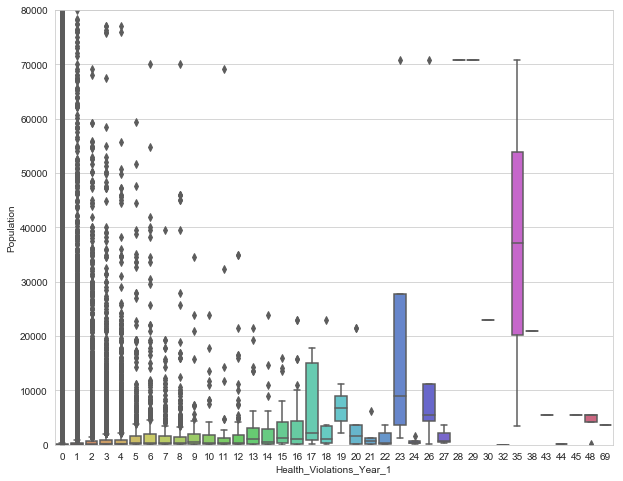

In [308]:
plot1 = sb.boxplot(x='Health_Violations_Year_1', y='Population', data=df_update1, palette='hls')
plot1.set(ylim=(0,80000))

[(0, 80000)]

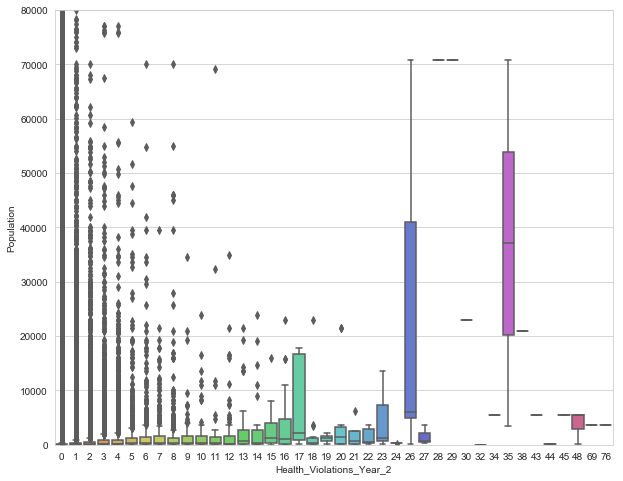

In [309]:
plot1 = sb.boxplot(x='Health_Violations_Year_2', y='Population', data=df_update1, palette='hls')
plot1.set(ylim=(0,80000))

[(0, 80000)]

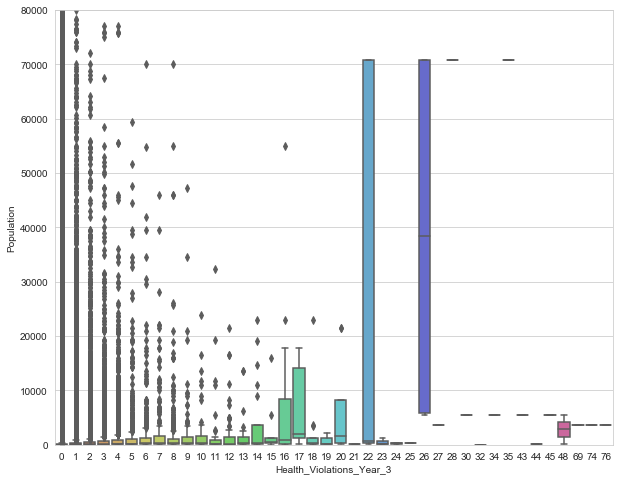

In [310]:
plot1 = sb.boxplot(x='Health_Violations_Year_3', y='Population', data=df_update1, palette='hls')
plot1.set(ylim=(0,80000))

### As expected, regions that serve smaller populations (10,000 people or less) experience the most number of health based violations as the lower 50% of violations occur the most with populations around even 5,000 people

In [311]:
df_update1.sort_values(['Year', 'Population', 'Health_Violations_Year_0'], ascending=False, inplace=True)
df_update1.head()

,Population,Year,Health_Violations_Year_0,Health_Violations_Year_1,Other_Violations_Year_1,Health_Violations_Year_2,Other_Violations_Year_2,Health_Violations_Year_3,Other_Violations_Year_3,Health_Violations_Year_4,Other_Violations_Year_4,Health_Violations_Year_5,Other_Violations_Year_5,Enforcements_Year_1,Enforcements_Year_2,Enforcements_Year_3,Enforcements_Year_4,Enforcements_Year_5,Epa_Region_2,Epa_Region_3,Epa_Region_4,Epa_Region_5,Epa_Region_6,Epa_Region_7,Epa_Region_8,Epa_Region_9,Epa_Region_10,State_AL,State_AR,State_AS,State_AZ,State_BC,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_GU,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MP,State_MS,State_MT,State_NB,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NS,State_NV,State_NY,State_OH,State_OK,State_ON,State_OR,State_PA,State_PQ,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY,state_check
19816,10000000.0,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
279332,8271000.0,2018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
86654,6010890.0,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19895,4061504.0,2018,1,0,0,1,2,0,0,1,0,0,0,0,4,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
92174,2700000.0,2018,0,0,0,0,3,0,0,0,0,0,0,3,6,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [312]:
df_update2 = df_update1.copy()

In [315]:
df_update2.reset_index(drop=True, inplace=True)
df_update2.head()

,Population,Year,Health_Violations_Year_0,Health_Violations_Year_1,Other_Violations_Year_1,Health_Violations_Year_2,Other_Violations_Year_2,Health_Violations_Year_3,Other_Violations_Year_3,Health_Violations_Year_4,Other_Violations_Year_4,Health_Violations_Year_5,Other_Violations_Year_5,Enforcements_Year_1,Enforcements_Year_2,Enforcements_Year_3,Enforcements_Year_4,Enforcements_Year_5,Epa_Region_2,Epa_Region_3,Epa_Region_4,Epa_Region_5,Epa_Region_6,Epa_Region_7,Epa_Region_8,Epa_Region_9,Epa_Region_10,State_AL,State_AR,State_AS,State_AZ,State_BC,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_GU,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MP,State_MS,State_MT,State_NB,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NS,State_NV,State_NY,State_OH,State_OK,State_ON,State_OR,State_PA,State_PQ,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY,state_check
0,10000000.0,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8271000.0,2018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6010890.0,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4061504.0,2018,1,0,0,1,2,0,0,1,0,0,0,0,4,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2700000.0,2018,0,0,0,0,3,0,0,0,0,0,0,3,6,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_update2['Health_Violations_Year_1'].value_counts()

In [324]:
df_update2['Health_Violations_Year_1'].value_counts()

0     2020382
1       25125
2        6747
4        3212
3        2932
5         687
8         604
6         487
7         302
9         133
12        125
10        111
11         67
16         41
14         36
13         31
15         26
17         15
18          9
20          9
24          8
22          7
21          5
26          5
48          4
23          4
27          3
19          2
35          2
38          1
45          1
44          1
43          1
28          1
32          1
30          1
29          1
69          1
Name: Health_Violations_Year_1, dtype: int64

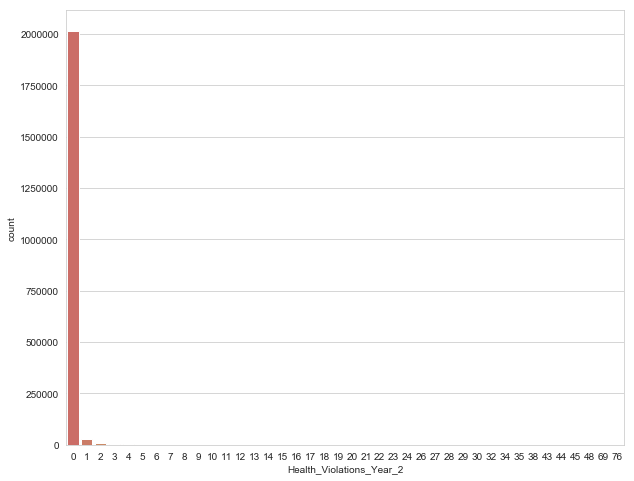

In [318]:
sb.countplot(x='Health_Violations_Year_2', data=df_update2, palette='hls')


## Checking for independence between features:

In [ ]:
# sb.heatmap(one_hot_copy.corr(), robust=True)  

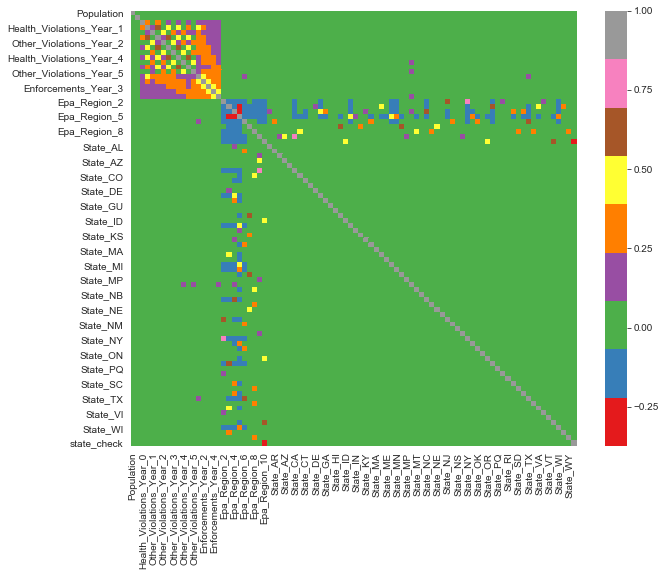

In [326]:
sb.heatmap(df_update2[0:.corr(), cmap='Set1') 

### Convert Date's into dummies:

In [83]:
hot_copy_copy = one_hot_copy.copy()

In [86]:
import datetime as dt
hot_copy_copy['YEAR']= hot_copy_copy['YEAR'].map(dt.datetime.toordinal)
 

In [89]:
hot_copy_copy.YEAR.unique()

array([736695, 736330, 735964, 735599, 735234])

In [ ]:
unscaled_inputs = data_with_targets.iloc[:, :-1]

